In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sympy import *
c0, c1, c2, c3 = symbols('c_0, c_1, c_2, c_3')

In [3]:
A = Matrix([
    [c0, c1, c2, c3],
    [c3, -c2, c1, -c0],
    [c2, c3, c0, c1],
    [c1, -c0, c3, -c2]
])
A

Matrix([
[c_0,  c_1, c_2,  c_3],
[c_3, -c_2, c_1, -c_0],
[c_2,  c_3, c_0,  c_1],
[c_1, -c_0, c_3, -c_2]])

In [4]:
eqs = [
    (A * Matrix([1, 1, 1, 1]))[1],
    (A * Matrix([1, 2, 3, 4]))[1],
    A * A.transpose() - eye(4)
]

In [5]:
solutions = solve(eqs)

print(solutions)

for solution in solutions:
    for name, sol in solution.items():
        print(name, float(sol))
solution = solutions[2]

[{c_0: (-2 + sqrt(3))*sqrt(sqrt(3) + 2)/4, c_1: (-3 + 2*sqrt(3))*sqrt(sqrt(3) + 2)/4, c_2: sqrt(3*sqrt(3) + 6)/4, c_3: sqrt(sqrt(3)/16 + 1/8)}, {c_0: -sqrt(2 - sqrt(3))*(sqrt(3) + 2)/4, c_1: -sqrt(2 - sqrt(3))*(3 + 2*sqrt(3))/4, c_2: -sqrt(6 - 3*sqrt(3))/4, c_3: sqrt(1/8 - sqrt(3)/16)}, {c_0: sqrt(2 - sqrt(3))*(sqrt(3) + 2)/4, c_1: sqrt(2 - sqrt(3))*(3 + 2*sqrt(3))/4, c_2: sqrt(6 - 3*sqrt(3))/4, c_3: -sqrt(1/8 - sqrt(3)/16)}, {c_0: (2 - sqrt(3))*sqrt(sqrt(3) + 2)/4, c_1: (3 - 2*sqrt(3))*sqrt(sqrt(3) + 2)/4, c_2: -sqrt(3*sqrt(3) + 6)/4, c_3: -sqrt(sqrt(3)/16 + 1/8)}]
c_0 -0.12940952255126037
c_1 0.2241438680420134
c_2 0.8365163037378079
c_3 0.48296291314453416
c_0 -0.48296291314453416
c_1 -0.8365163037378079
c_2 -0.2241438680420134
c_3 0.12940952255126037
c_0 0.48296291314453416
c_1 0.8365163037378079
c_2 0.2241438680420134
c_3 -0.12940952255126037
c_0 0.12940952255126037
c_1 -0.2241438680420134
c_2 -0.8365163037378079
c_3 -0.48296291314453416


In [7]:
c0f, c1f, c2f, c3f = [float(sol) for sol in solutions[2].values()]

In [11]:
def daub_matrix_eval(n):
    A = np.zeros((n, n))
    block = np.asarray([[c0f, c1f, c2f, c3f], [c3f, -c2f, c1f, -c0f]])
    for i in range(n//2 - 1):
        A[2*i:2*i+2,2*i:2*i+4] = block
    A[n-2:n,0:2] = block[:,2:]
    A[n-2:n,-2:] = block[:,:2]
    return A
    
daub_matrix(16)

array([[ 0.48296291,  0.8365163 ,  0.22414387, -0.12940952,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.12940952, -0.22414387,  0.8365163 , -0.48296291,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.48296291,  0.8365163 ,  0.22414387,
        -0.12940952,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.12940952, -0.22414387,  0.8365163 ,
        -0.48296291,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0

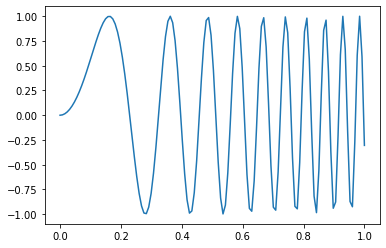

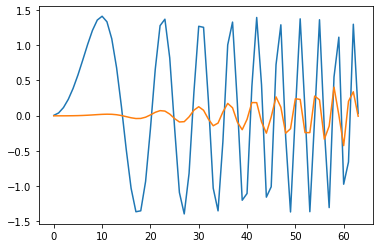

In [12]:
N = 128

t = np.linspace(0, 1, N)
y = np.sin(60*t**2)
plt.plot(t, y)
plt.show()

filtered = np.matmul(daub_matrix_eval(N), y)
smooth = filtered[::2]
detailed = filtered[1::2]

plt.plot(smooth)
plt.plot(detailed)

In [20]:
def daub_transform(signal):
    N = signal.size
    
    n = N
    transform = np.zeros((0,))
    y = signal.copy()
    intermediates = []
    
    while n > 2:
        filtered = daub_matrix_eval(n).dot(y)
        smooth = filtered[::2]
        detailed = filtered[1::2]
        intermediates.append((smooth, detailed))
        transform = np.append(detailed, transform)
        n = n//2
        y = smooth
    transform = np.append(smooth, transform)
    return transform, intermediates

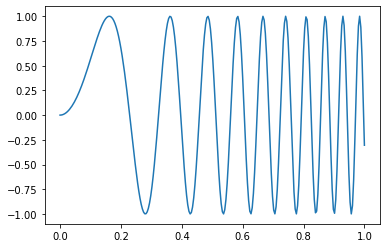

In [23]:
N = 256

t = np.linspace(0, 1, N)
y = np.sin(60*t**2)
plt.plot(t, y)
plt.show()

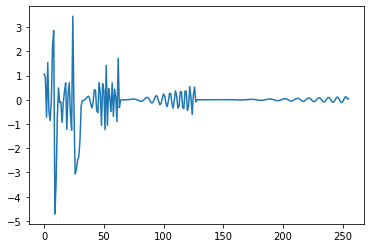

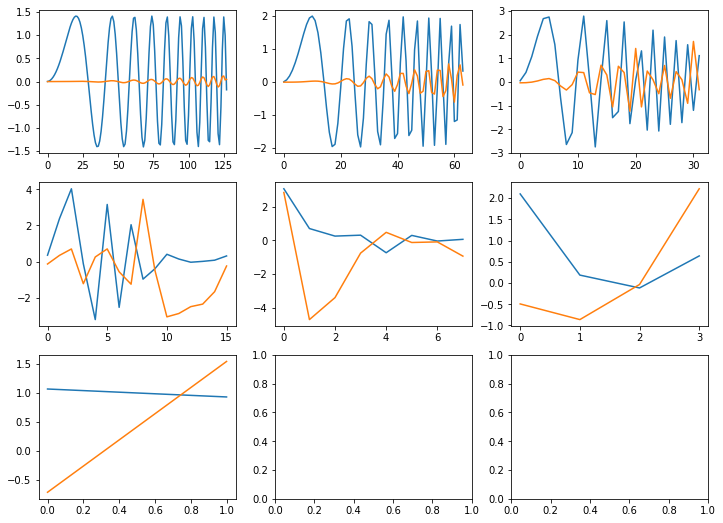

In [24]:
transform, intermediates = daub_transform(y)
plt.plot(transform)
plt.show()

ncols = 3
nrows = int(np.ceil(len(intermediates) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(12, 9))
for i, (smooth, detail) in enumerate(intermediates):
    ax[i//ncols, i%ncols].plot(smooth)
    ax[i//ncols, i%ncols].plot(detail)
plt.show()

In [34]:
def daub_backtransform(transform):
    
    transform = transform.copy()
    m = transform.size
    N = transform.size
    y = np.zeros((0,))
    intermediates = []
    n = 2
    smooth = transform[:n]
    transform = transform[n:]
    
    while n < N:
        detailed = transform[:n]
        intermediates.append((smooth, detailed))
        transform = transform[n:]
        unordered = np.dstack([smooth, detailed]).flatten()
        n = n * 2
        unfiltered = daub_matrix_eval(n).transpose().dot(unordered)
        smooth = unfiltered
    y = smooth
    return y, smooth

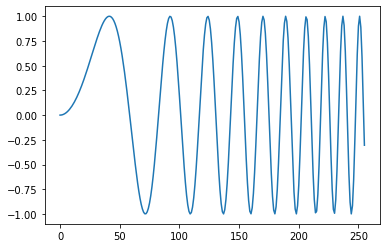

In [35]:
signal, intermediates = daub_backtransform(transform)
plt.plot(signal)

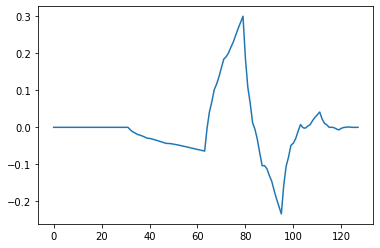

In [36]:
N = 128
transform2 = np.zeros((N))
transform2[5] = 1
signal3, intermediates = daub_backtransform(transform2)
plt.plot(signal3)